Artificial Neural Network

Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

Loading the CSV file into data frame using pandas

In [ ]:
uric_df = pd.read_csv('/content/URIC ACID.csv')
uric_df

,Age,Sex,S. Uric Acid,Normal Range,Target
0,37,F,5.00,6.2,0
1,57,F,4.76,6.2,0
2,35,M,6.45,7.2,0
3,25,F,6.06,6.2,0
4,69,M,4.66,7.2,0
...,...,...,...,...,...
96,27,M,6.57,7.2,0
97,39,F,5.21,6.2,0
98,26,M,6.90,7.2,0
99,61,M,4.63,7.2,0


In [ ]:
uric_df['Sex'].replace('F', 0, inplace = True)
uric_df['Sex'].replace('M', 1, inplace = True)
uric_df

,Age,Sex,S. Uric Acid,Normal Range,Target
0,37,0,5.00,6.2,0
1,57,0,4.76,6.2,0
2,35,1,6.45,7.2,0
3,25,0,6.06,6.2,0
4,69,1,4.66,7.2,0
...,...,...,...,...,...
96,27,1,6.57,7.2,0
97,39,0,5.21,6.2,0
98,26,1,6.90,7.2,0
99,61,1,4.63,7.2,0


Understanding the data

In [ ]:
uric_df.shape

(101, 5)

In [ ]:
uric_df.head()

,Age,Sex,S. Uric Acid,Normal Range,Target
0,37,0,5.00,6.2,0
1,57,0,4.76,6.2,0
2,35,1,6.45,7.2,0
3,25,0,6.06,6.2,0
4,69,1,4.66,7.2,0


In [ ]:
uric_df.tail()

,Age,Sex,S. Uric Acid,Normal Range,Target
96,27,1,6.57,7.2,0
97,39,0,5.21,6.2,0
98,26,1,6.90,7.2,0
99,61,1,4.63,7.2,0
100,32,1,4.45,7.2,0


In [ ]:
uric_df.describe()

,Age,Sex,S. Uric Acid,Normal Range,Target
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,41.623762,0.623762,6.170099,6.823762,0.326733
std,13.451284,0.486857,2.070891,0.486857,0.471358
min,9.000000,0.000000,2.310000,6.200000,0.000000
25%,31.000000,0.000000,4.630000,6.200000,0.000000
50%,39.000000,1.000000,5.820000,7.200000,0.000000
75%,52.000000,1.000000,7.600000,7.200000,1.000000
max,74.000000,1.000000,13.880000,7.200000,1.000000


Negative(0):  68
Positive(1):  33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


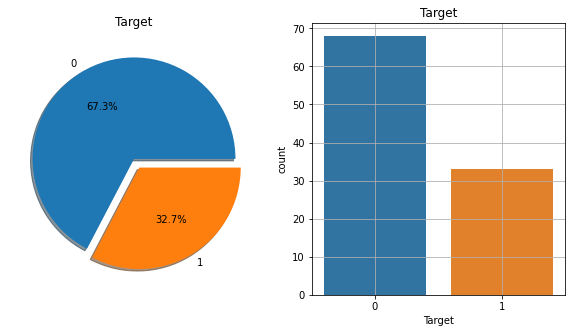

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1,2,figsize = (10,5))
uric_df['Target'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot('Target', data = uric_df, ax = ax[1])
ax[1].set_title('Target')
N, P = uric_df['Target'].value_counts()
print('Negative(0): ', N)
print('Positive(1): ', P)
plt.grid()
plt.show()

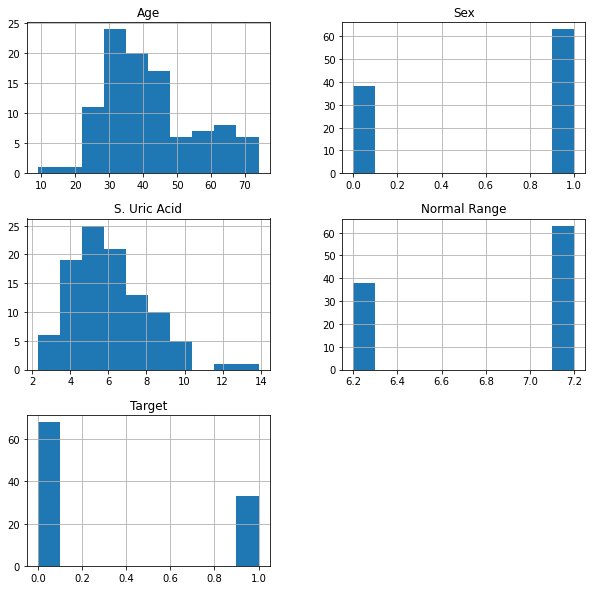

In [ ]:
uric_df.hist(bins = 10, figsize = (10,10))
plt.show()

In [ ]:
correlation = uric_df.corr()

In [ ]:
correlation

,Age,Sex,S. Uric Acid,Normal Range,Target
Age,1.000000,-0.082911,-0.043730,-0.082911,-0.057700
Sex,-0.082911,1.000000,0.212093,1.000000,0.105273
S. Uric Acid,-0.043730,0.212093,1.000000,0.212093,0.793303
Normal Range,-0.082911,1.000000,0.212093,1.000000,0.105273
Target,-0.057700,0.105273,0.793303,0.105273,1.000000


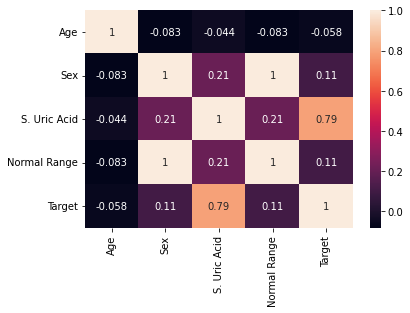

In [ ]:
sns.heatmap(correlation, annot = True)

Splitting the Target and other columns

In [ ]:
x = uric_df.drop(columns = 'Target', axis = 1)
y = uric_df['Target']

In [ ]:
print(x)

     Age  Sex  S. Uric Acid  Normal Range
0     37    0          5.00           6.2
1     57    0          4.76           6.2
2     35    1          6.45           7.2
3     25    0          6.06           6.2
4     69    1          4.66           7.2
..   ...  ...           ...           ...
96    27    1          6.57           7.2
97    39    0          5.21           6.2
98    26    1          6.90           7.2
99    61    1          4.63           7.2
100   32    1          4.45           7.2

[101 rows x 4 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: Target, Length: 101, dtype: int64


Splitting the data into Training data and Test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(101, 4) (80, 4) (21, 4)


In [ ]:
print(x_train)

    Age  Sex  S. Uric Acid  Normal Range
62   63    1          4.13           7.2
3    25    0          6.06           6.2
71   42    1          9.66           7.2
45   33    1          9.22           7.2
48   45    1         10.12           7.2
..  ...  ...           ...           ...
97   39    0          5.21           6.2
67   45    0          4.77           6.2
64   28    0          5.63           6.2
47   43    1          8.13           7.2
44   43    0          3.38           6.2

[80 rows x 4 columns]


In [ ]:
print(x_test)

    Age  Sex  S. Uric Acid  Normal Range
26   53    0          4.75           6.2
86   55    1          5.06           7.2
2    35    1          6.45           7.2
55   68    0          8.94           6.2
75   31    0          3.08           6.2
94   44    0          2.31           6.2
16   33    0          4.52           6.2
73   31    1          5.23           7.2
54   33    1          7.53           7.2
96   27    1          6.57           7.2
53    9    1          8.12           7.2
93   70    1          5.76           7.2
78   33    1          4.56           7.2
13   36    1          5.78           7.2
7    45    0          4.53           6.2
30   30    0          4.90           6.2
22   53    0          6.30           6.2
24   40    1          3.36           7.2
33   33    1          8.49           7.2
8    54    1         12.65           7.2
43   65    0          5.36           6.2


Fitting and Evaluation

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 1.65398715  0.7540739  -1.05252112  0.7540739 ]
 [-1.27957232 -1.32612997 -0.08824615 -1.32612997]
 [ 0.03280955  0.7540739   1.71040147  0.7540739 ]
 [-0.66198086  0.7540739   1.49056676  0.7540739 ]
 [ 0.26440635  0.7540739   1.94022867  0.7540739 ]
 [ 0.11000848  0.7540739   0.61122793  0.7540739 ]
 [-0.73917979  0.7540739  -0.89264133  0.7540739 ]
 [-0.66198086  0.7540739   0.18155099  0.7540739 ]
 [ 1.65398715  0.7540739  -0.8077052   0.7540739 ]
 [-0.97077659 -1.32612997 -1.26236335 -1.32612997]
 [ 2.27157862  0.7540739  -0.44297943  0.7540739 ]
 [ 0.03280955  0.7540739  -0.20815599  0.7540739 ]
 [-0.27598619 -1.32612997 -0.33805832 -1.32612997]
 [ 0.41880421  0.7540739  -1.26735959  0.7540739 ]
 [ 0.80479888 -1.32612997  3.81881618 -1.32612997]
 [ 0.34160528  0.7540739  -0.15319731  0.7540739 ]
 [ 1.57678822 -1.32612997  0.53128803 -1.32612997]
 [ 1.19079355  0.7540739  -1.41225065  0.7540739 ]
 [ 2.19437969  0.7540739   0.28147586  0.7540739 ]
 [ 1.19079355 -1.32612997 -0.73

In [ ]:
print(x_test)

[[ 0.88199782 -1.32612997 -0.74275403 -1.32612997]
 [ 1.03639568  0.7540739  -0.58787049  0.7540739 ]
 [-0.50758299  0.7540739   0.10660734  0.7540739 ]
 [ 2.03998182 -1.32612997  1.35067195 -1.32612997]
 [-0.81637872 -1.32612997 -1.57712668 -1.32612997]
 [ 0.18720741 -1.32612997 -1.96183742 -1.32612997]
 [-0.66198086 -1.32612997 -0.85766763 -1.32612997]
 [-0.81637872  0.7540739  -0.50293435  0.7540739 ]
 [-0.66198086  0.7540739   0.64620163  0.7540739 ]
 [-1.12517446  0.7540739   0.16656226  0.7540739 ]
 [-2.51475526  0.7540739   0.94097999  0.7540739 ]
 [ 2.19437969  0.7540739  -0.23813345  0.7540739 ]
 [-0.66198086  0.7540739  -0.83768266  0.7540739 ]
 [-0.43038405  0.7540739  -0.22814096  0.7540739 ]
 [ 0.26440635 -1.32612997 -0.85267139 -1.32612997]
 [-0.89357766 -1.32612997 -0.66781038 -1.32612997]
 [ 0.88199782 -1.32612997  0.03166369 -1.32612997]
 [-0.12158832  0.7540739  -1.43723186  0.7540739 ]
 [-0.66198086  0.7540739   1.12584099  0.7540739 ]
 [ 0.95919675  0.7540739   3.20

Initialization ANN(Artificial Neural Network)

In [ ]:
#Initialising ANN
ann_uric = tf.keras.models.Sequential()

In [ ]:
#Adding First Hidden Layer
ann_uric.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Second Hidden Layer
ann_uric.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#Adding Output Layer
ann_uric.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann_uric.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann_uric.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.6731 - accuracy: 0.5375
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.5625
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.5625
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.5875
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6125
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.6375
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6375
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6375
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6375
Epoch 11/100
3/3 [===========

In [ ]:
y_log = ann_uric.predict(x_test)

1/1 [==============================] - 0s 80ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
ann = accuracy_score(y_test, y_pred)
ann

0.9047619047619048

In [ ]:
ann_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of the Test data: " + str(round(ann_accuracy, 2))+ '%')

Accuracy of the Test data: 90.48%


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
# training the logistic regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# accuracy score
# training data trd
x_train_pred = model.predict(x_train)
trd_accuracy = accuracy_score(x_train_pred, y_train)*100
print("Accuracy of the Training data: " + str(round(trd_accuracy, 2))+ '%')

Accuracy of the Training data: 100.0%


In [ ]:
# test data ted
x_test_pred = model.predict(x_test)
ted_accuracy = accuracy_score(x_test_pred, y_test)*100
print("Accuracy of the Test data: " + str(round(ted_accuracy, 2)) + '%')

Accuracy of the Test data: 95.24%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
sc = StandardScaler()

In [ ]:
# training the model with training dataset
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train)

[[ 1.65398715  0.7540739  -1.05252112  0.7540739 ]
 [-1.27957232 -1.32612997 -0.08824615 -1.32612997]
 [ 0.03280955  0.7540739   1.71040147  0.7540739 ]
 [-0.66198086  0.7540739   1.49056676  0.7540739 ]
 [ 0.26440635  0.7540739   1.94022867  0.7540739 ]
 [ 0.11000848  0.7540739   0.61122793  0.7540739 ]
 [-0.73917979  0.7540739  -0.89264133  0.7540739 ]
 [-0.66198086  0.7540739   0.18155099  0.7540739 ]
 [ 1.65398715  0.7540739  -0.8077052   0.7540739 ]
 [-0.97077659 -1.32612997 -1.26236335 -1.32612997]
 [ 2.27157862  0.7540739  -0.44297943  0.7540739 ]
 [ 0.03280955  0.7540739  -0.20815599  0.7540739 ]
 [-0.27598619 -1.32612997 -0.33805832 -1.32612997]
 [ 0.41880421  0.7540739  -1.26735959  0.7540739 ]
 [ 0.80479888 -1.32612997  3.81881618 -1.32612997]
 [ 0.34160528  0.7540739  -0.15319731  0.7540739 ]
 [ 1.57678822 -1.32612997  0.53128803 -1.32612997]
 [ 1.19079355  0.7540739  -1.41225065  0.7540739 ]
 [ 2.19437969  0.7540739   0.28147586  0.7540739 ]
 [ 1.19079355 -1.32612997 -0.73

In [ ]:
print(x_test)

[[ 0.75047323 -1.15470054 -0.51763757 -1.15470054]
 [ 0.88460036  0.8660254  -0.38009387  0.8660254 ]
 [-0.45667094  0.8660254   0.23663432  0.8660254 ]
 [ 1.75642671 -1.15470054  1.34142079 -1.15470054]
 [-0.7249252  -1.15470054 -1.25859878 -1.15470054]
 [ 0.14690114 -1.15470054 -1.60023957 -1.15470054]
 [-0.59079807 -1.15470054 -0.61968612 -1.15470054]
 [-0.7249252   0.8660254  -0.30466668  0.8660254 ]
 [-0.59079807  0.8660254   0.71581881  0.8660254 ]
 [-0.99317947  0.8660254   0.28987704  0.8660254 ]
 [-2.20032364  0.8660254   0.97759553  0.8660254 ]
 [ 1.89055384  0.8660254  -0.06951133  0.8660254 ]
 [-0.59079807  0.8660254  -0.60193855  0.8660254 ]
 [-0.38960738  0.8660254  -0.06063754  0.8660254 ]
 [ 0.21396471 -1.15470054 -0.61524923 -1.15470054]
 [-0.79198877 -1.15470054 -0.45108417 -1.15470054]
 [ 0.75047323 -1.15470054  0.17008092 -1.15470054]
 [-0.12135312  0.8660254  -1.13436576  0.8660254 ]
 [-0.59079807  0.8660254   1.14176058  0.8660254 ]
 [ 0.81753679  0.8660254   2.98

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
xtrain_svm_pred = svc.predict(x_train)

In [ ]:
xtrain_svm_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
confusion_matrix(y_train, xtrain_svm_pred)

array([[53,  0],
       [ 0, 27]])

In [ ]:
accuracy_score(y_train, xtrain_svm_pred)
svm_train_accuracy = accuracy_score(y_train, xtrain_svm_pred)*100
print("Accuracy of training data is: " + str(round(svm_train_accuracy, 2)) + '%')

Accuracy of training data is: 100.0%


In [ ]:
xtest_svm_pred = svc.predict(x_test)
xtest_svm_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
confusion_matrix(y_test, xtest_svm_pred)

array([[15,  0],
       [ 1,  5]])

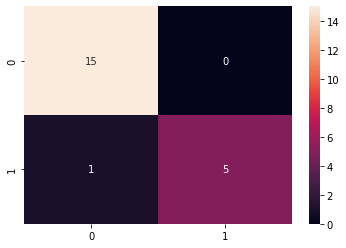

In [ ]:
sns.heatmap(confusion_matrix(y_test,xtest_svm_pred), annot = True, fmt = "d")

In [ ]:
accuracy_score(y_test, xtest_svm_pred)
svm_test_accuracy = accuracy_score(y_test, xtest_svm_pred)*100
print("Accuracy of the model or test data is: " + str(round(svm_test_accuracy, 2)) + '%')

Accuracy of the model or test data is: 95.24%


Comparison between the three models

In [ ]:
model_compare = pd.DataFrame({"Artificial Neural Network":ann_accuracy,
                              "Logistic Regression":ted_accuracy,
                              "Support Vector Machine":svm_test_accuracy,}, index = ["accuracy"])
model_compare

,Artificial Neural Network,Logistic Regression,Support Vector Machine
accuracy,90.47619,95.238095,95.238095
